Ejercicio 6 - Redes Neuronales con Keras

En este ejercicio, tu objetivo será entrenar modelos de Redes Neuronales utilizando Keras (y Tensorflow como backend) para familiarizarte con la librería.



In [5]:
%load_ext autoreload
%autoreload 2
%matplotlib 
import matplotlib.pyplot as plt
import utils

Using matplotlib backend: Qt5Agg


# Entrena un modelo de Redes Neuronales con Keras para varios datasets



Podés elegir el dataset comentando/descomentando las líneas 9 a 17. Comentá todos los datasets salvo el que quieras usar.

Intenta obtener una buena performance en todos los casos. Prueba activando o no la normalización (últimas líneas) ¿Qué datasets no puede aprender el modelo?
## Preguntas

1. Como leer bien las metricas loss y acc?
2. Testing? Conviene utilizarlo?
3. moons_mis-scaled? el loss es creciente sin importar la topologia y cambios. Causa? Lectura?
4. Que significa loss en training creciente?

## Ej 6 TP

| Archivo |  Mejor Acc | Mejor Loss | Iteraciones | Tasa de aprendizaje | Topologia |
| --- | --- | --- | --- | --- | --- |
| 2_clases_simples | 1 | 0.1155 | 5 | 0.1 |  dense(6,tanh) |
| 6_clases_dificil | 0.80 | 0.52 | 5 | 0.1 | dense(6,tanh) - dense(6,'relu')|
| 2_moons | 0.85 | 0.35 | 100 | 0.1 | dense(4,tanh) - dense(4,tanh) - dense(4,tanh) |

In [22]:
import tensorflow as tf
import keras
import numpy as np
import utils 
import os

# Selección del dataset; descomenta el que quieras usar
# Datasets en 2D
#dataset = "2_clases_simple.csv"
#dataset = "6_clases_dificil.csv"
#dataset = "moons.csv"
#dataset = "moons_mis-scaled.csv"
dataset = "circulos.csv"

# Dataset con más de 2 dimensiones
# dataset = "iris.csv"
# dataset = "diabetes.csv"

# Carga del dataset
dataset_path=os.path.join("datasets_clasificacion",dataset)
data=np.loadtxt(open(dataset_path, "rb"), delimiter=",", skiprows=1)
#np.random.shuffle(data)
#x,y=data[:,0:-1],data[:,-1]
#classes=int(y.max()+1)
## cantidad de ejemplos y dimension de entrada
#n,d_in=x.shape
## separamos testing de training
#n_training = int(2*n/3)
#n_testing = int(n/3)
x,y,x_test,y_test = utils.dividir_dataset_training_testing(data)
classes=int(np.concatenate([y,y_test]).max()+1)
n,d_in=np.concatenate([x,x_test]).shape
#x_test = x[n_training:n,:]
#x = x[0:n_training,:]

#y_test = y[n_training:n]
#y = y[0:n_training]
## calcula la cantidad de clases

print("Información del conjunto de datos:")
print(f"Ejemplos: {n}")
print(f"Variables de entrada: {d_in}")
print(f"Cantidad de clases: {classes}")

# Normalizo las variables de entrada
for i in range(d_in):
    x[:,i]=(x[:,i]-x[:,i].mean())/x[:,i].std()

Información del conjunto de datos:
Ejemplos: 300
Variables de entrada: 2
Cantidad de clases: 2


Inicialización aleatoria del modelo (podes volver a correr esta celda para obtener otros resultados)
Train on 240 samples, validate on 60 samples
Epoch 1/200
240/240 [==============================] - 1s 2ms/step - loss: 0.7776 - acc: 0.4333 - val_loss: 0.7057 - val_acc: 0.4667
Epoch 2/200
240/240 [==============================] - 0s 115us/step - loss: 0.7286 - acc: 0.4083 - val_loss: 0.6916 - val_acc: 0.4000
Epoch 3/200
240/240 [==============================] - 0s 116us/step - loss: 0.7070 - acc: 0.3417 - val_loss: 0.6798 - val_acc: 0.4333
Epoch 4/200
240/240 [==============================] - 0s 151us/step - loss: 0.6875 - acc: 0.3958 - val_loss: 0.6692 - val_acc: 0.5500
Epoch 5/200
240/240 [==============================] - 0s 129us/step - loss: 0.6721 - acc: 0.5042 - val_loss: 0.6647 - val_acc: 0.6500
Epoch 6/200
240/240 [==============================] - 0s 105us/step - loss: 0.6673 - acc: 0.5667 - val_loss: 0.6602 - val_acc: 0.7333
Epoch 7/200
240/240 [=========================

Epoch 60/200
240/240 [==============================] - 0s 123us/step - loss: 0.3776 - acc: 0.8375 - val_loss: 0.5882 - val_acc: 0.7333
Epoch 61/200
240/240 [==============================] - 0s 159us/step - loss: 0.3783 - acc: 0.8292 - val_loss: 0.5826 - val_acc: 0.7333
Epoch 62/200
240/240 [==============================] - 0s 151us/step - loss: 0.3747 - acc: 0.8333 - val_loss: 0.5445 - val_acc: 0.7667
Epoch 63/200
240/240 [==============================] - 0s 145us/step - loss: 0.3791 - acc: 0.8167 - val_loss: 0.5743 - val_acc: 0.7333
Epoch 64/200
240/240 [==============================] - 0s 141us/step - loss: 0.3751 - acc: 0.8333 - val_loss: 0.5741 - val_acc: 0.7333
Epoch 65/200
240/240 [==============================] - 0s 151us/step - loss: 0.3753 - acc: 0.8375 - val_loss: 0.5792 - val_acc: 0.7333
Epoch 66/200
240/240 [==============================] - 0s 158us/step - loss: 0.3768 - acc: 0.8333 - val_loss: 0.5704 - val_acc: 0.7333
Epoch 67/200
240/240 [==========================

Epoch 120/200
240/240 [==============================] - 0s 111us/step - loss: 0.3727 - acc: 0.8250 - val_loss: 0.5702 - val_acc: 0.6833
Epoch 121/200
240/240 [==============================] - 0s 96us/step - loss: 0.3703 - acc: 0.8417 - val_loss: 0.5879 - val_acc: 0.6833
Epoch 122/200
240/240 [==============================] - 0s 141us/step - loss: 0.3706 - acc: 0.8333 - val_loss: 0.6140 - val_acc: 0.6667
Epoch 123/200
240/240 [==============================] - 0s 83us/step - loss: 0.3686 - acc: 0.8333 - val_loss: 0.5983 - val_acc: 0.6667
Epoch 124/200
240/240 [==============================] - 0s 131us/step - loss: 0.3734 - acc: 0.8375 - val_loss: 0.5566 - val_acc: 0.7500
Epoch 125/200
240/240 [==============================] - 0s 116us/step - loss: 0.3720 - acc: 0.8375 - val_loss: 0.6041 - val_acc: 0.6667
Epoch 126/200
240/240 [==============================] - 0s 161us/step - loss: 0.3696 - acc: 0.8333 - val_loss: 0.5824 - val_acc: 0.6833
Epoch 127/200
240/240 [====================

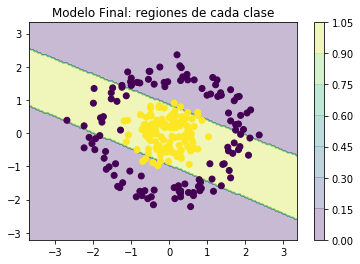

In [60]:
# Creación del modelo inicial
print("Inicialización aleatoria del modelo (podes volver a correr esta celda para obtener otros resultados)")

# Creo un modelo logístico
modelo = keras.Sequential([
    # input_shape solo en la primer capa
    # Capa con 3 salidas, activación relu
    keras.layers.Dense(4,input_shape=(d_in,), activation='tanh'),
    # Capa con 5 salidas, activación tanh
    #keras.layers.Dense(4, activation='sigmoid'),
    keras.layers.Dense(4, activation='relu'),

    #keras.layers.Dense(2, activation='tanh'),
    #la ultima capa si o si tiene que tener tantas salidas como clases, y softmax 
    keras.layers.Dense(classes, activation='softmax')])

# visualización del modelo inicial (si hay solo 2 variables de entrada)
#if d_in==2:
#    d = utils.plot_regresion_logistica2D(modelo,x,y,title=f"Modelo inicial",detail=0.05)


modelo.compile(
  optimizer=keras.optimizers.SGD(lr=0.1), 
  loss='sparse_categorical_crossentropy', 
  # metricas para ir calculando en cada iteracion o batch 
  # Agregamos el accuracy del modelo
  metrics=['accuracy'], 
)

# Entrenamiento del modelo
history = modelo.fit(x,y,epochs=200,batch_size=32,validation_data=(x_test,y_test))


# visualización del modelo final (si hay solo 2 variables de entrada)
if d_in==2:
    utils.plot_regresion_logistica2D(modelo,x,y,title=f"Modelo Final",detail=0.05)


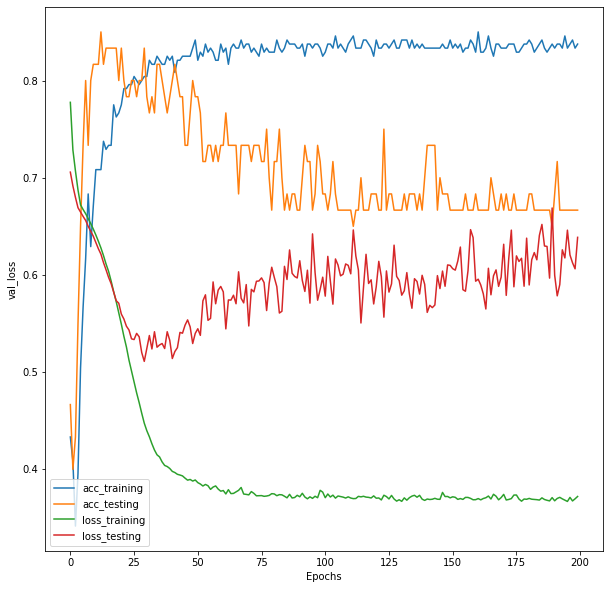

In [61]:
plotter = utils.MetricsPlotter(history)
plotter.full_plot()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fb680d04ba8>,
      dtype=object)

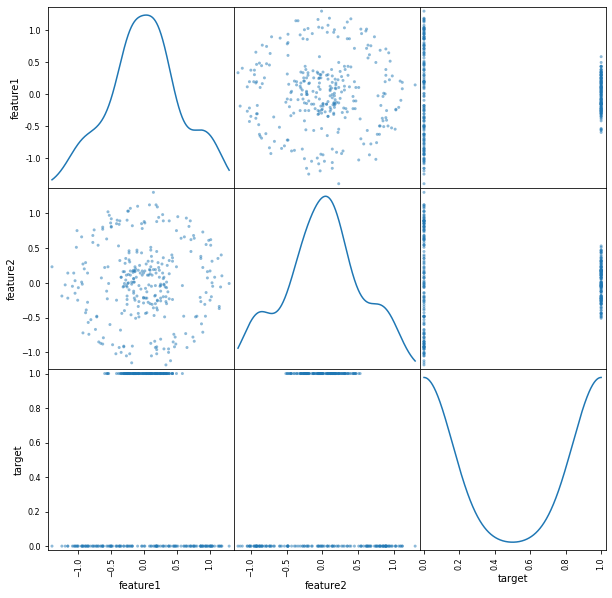

In [59]:
import pandas as pd
df = pd.read_csv(dataset_path)
pd.plotting.scatter_matrix(df,figsize=(10,10), diagonal='kde')

In [1]:
import utilslib
import keras
import numpy as np
t = utilslib.TopologyManager()
t.random_topology()

/home/chudix/.virtualenvs/deep_learning/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:469: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/home/chudix/.virtualenvs/deep_learning/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:470: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/home/chudix/.virtualenvs/deep_learning/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:471: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/home/chudix/.virtualenvs/deep_

[<keras.layers.core.Dense object at 0x7f60a10899b0>, <keras.layers.core.Activation object at 0x7f606bbebda0>, <keras.layers.core.Dense object at 0x7f606bbebd30>, <keras.layers.core.Activation object at 0x7f606ba3c2b0>]


Using TensorFlow backend.
